## Introduction to Text Mining
Author: Burhan Abbasi <br>
Date: March 21, 2019 <br>

Disclaimer:
This tutorial is inspired from [article](https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk) by Avinash Navlani and [NLTK](https://www.nltk.org/book/ch02.html) guide.

**Natural Language Processing (NLP)** helps the computer to understand the human language and derive meaning from it. NLP is applicable in several areas from speech recognition, language translation, classifying documents to information extraction. 
We chat, message, tweet, share status, email, write blogs, share opinion and feedback in our daily routine. All of these activities are generating text in a significant amount, which is unstructured in nature.
_Text mining_ is a process of exploring sizeable textual data and find patterns. While there is a difference in tasks that are included in text mining & NLP, following is a general list of task used in these domains.
>-Finding frequency counts of words <br>
>-Length of the sentence <br>
>-Presence/absence of specific words <br>
>-Identifying sentiment/emotions <br>
>-Finding entities in the sentence <br>
>-Category of blog/article <br>

## Part 1: Tools & Techniques
[**Natural Language Toolkit (NLTK)**](https://www.nltk.org/) is a widely used resource for Natural Language Processing. NLTK helps computer to analysis, preprocess, and understand the written text. It is free, opensource and well documented. Some of the most commonly used modules of NLTK include tokenizing, part-of-speech tagging, stemming, sentiment analysis, topic segmentation, and named entity recognition.

In [23]:
#Loading NLTK
import nltk
# nltk.download('punkt')
# nltk.download('inaugural')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('words')
from nltk.corpus import inaugural
inaugural.fileids()[:5]

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt']

In [24]:
years = [fileid[:4] for fileid in inaugural.fileids()]
print(years[-1])

2009


In [25]:
washington_raw = inaugural.raw('1789-Washington.txt')
lincoln_raw = inaugural.raw('1861-Lincoln.txt')
obama_raw = inaugural.raw('2009-Obama.txt')

##### Tokenization
Tokenization is the first step in text analytics. The process of breaking down a text into smaller chunks such as words or sentence is called Tokenization. Token is a single entity that is building blocks for sentence or paragraph. <br>
>If you would like to tokenize a paragraph into sentences you can use `Sentence Tokenizer` to break text paragraph into sentences.<br>
>If you would like to tokenize a sentence into words you can use `Word tokenizer` to break text sentence into words.


In [27]:
from nltk.tokenize import sent_tokenize, word_tokenize

### Sample output of sentence tokenizer

In [28]:
sent_tokenize(washington_raw)[:2]

['Fellow-Citizens of the Senate and of the House of Representatives:\n\nAmong the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month.',
 'On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time.']

### Sample output of word tokenizer

In [29]:
word_tokenize(sent_tokenize(washington_raw)[0])

['Fellow-Citizens',
 'of',
 'the',
 'Senate',
 'and',
 'of',
 'the',
 'House',
 'of',
 'Representatives',
 ':',
 'Among',
 'the',
 'vicissitudes',
 'incident',
 'to',
 'life',
 'no',
 'event',
 'could',
 'have',
 'filled',
 'me',
 'with',
 'greater',
 'anxieties',
 'than',
 'that',
 'of',
 'which',
 'the',
 'notification',
 'was',
 'transmitted',
 'by',
 'your',
 'order',
 ',',
 'and',
 'received',
 'on',
 'the',
 '14th',
 'day',
 'of',
 'the',
 'present',
 'month',
 '.']

Lets look more closely into the each speech

In [30]:
washington_sentences = len(sent_tokenize(washington_raw))
washington_words = len(word_tokenize(washington_raw))
print("George Washington used {} words and {} sentences".format(washington_words,washington_sentences))

lincoln_sentences = len(sent_tokenize(lincoln_raw))
lincoln_words = len(word_tokenize(lincoln_raw))
print("Lincoln used {} words and {} sentences".format(lincoln_words,lincoln_sentences))

obama_sentences = len(sent_tokenize(obama_raw))
obama_words = len(word_tokenize(obama_raw))
print("Obama used {} words and {} sentences".format(obama_words,obama_sentences))

George Washington used 1537 words and 23 sentences
Lincoln used 3999 words and 135 sentences
Obama used 2700 words and 110 sentences


Lets find out average number of words per sentence for each speech:

In [31]:
print("George Washington's average number of words per sentence: ",washington_words/washington_sentences)
print("Lincoln's average number of words per sentence: ", lincoln_words/lincoln_sentences)
print("Obama's average number of words per sentence: ", obama_words/obama_sentences)

George Washington's average number of words per sentence:  66.82608695652173
Lincoln's average number of words per sentence:  29.622222222222224
Obama's average number of words per sentence:  24.545454545454547


What is the difference is vocabulary used by each president?

In [32]:
print("Vocabulary used by George Washington: {} vs Lincoln: {} vs Obama: {}".format(
    len(set(word_tokenize(washington_raw))),
    len(set(word_tokenize(lincoln_raw))),
    len(set(word_tokenize(obama_raw)))
))

Vocabulary used by George Washington: 626 vs Lincoln: 1076 vs Obama: 934


In [33]:
from nltk import FreqDist

w_dist = FreqDist(word_tokenize(washington_raw))
l_dist = FreqDist(word_tokenize(lincoln_raw))
o_dist = FreqDist(word_tokenize(obama_raw))

w_dist.most_common(10)


[('the', 115),
 ('of', 71),
 (',', 70),
 ('and', 48),
 ('to', 47),
 ('which', 36),
 ('in', 28),
 ('.', 23),
 ('I', 23),
 ('be', 23)]

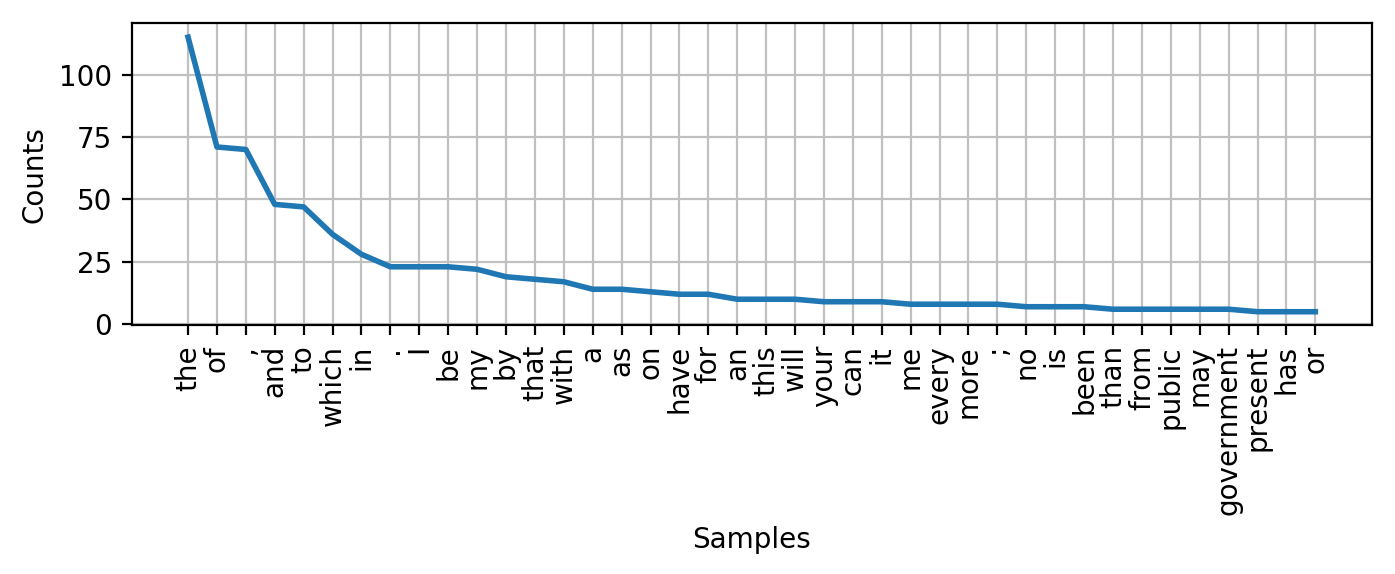

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,2), dpi=200)
w_dist.plot(40,cumulative=False)
plt.show()

**Stopwords**<br>
Stopwords considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc.<br>
In NLTK for removing stopwords, you need to create a list of stopwords and filter out your list of tokens from these words

In [35]:
from nltk.corpus import stopwords
print(set(stopwords.words("english")))
stop_words=stopwords.words("english")

{"couldn't", "wasn't", "aren't", 'hasn', 'me', 'now', 'both', 'has', 'such', 're', 'its', 'out', 'yourselves', 'hadn', "hasn't", 'this', 'further', "you'd", 'being', 'her', 'some', 'our', 'y', "don't", 'am', 'before', "haven't", 'against', 'what', 'for', 'up', 'she', "didn't", 'off', "it's", 'while', "you've", 'on', 'he', "doesn't", 'him', "won't", 'weren', 'we', 'in', 'than', 'once', "wouldn't", 'those', 'too', 'itself', 'yourself', 'needn', "hadn't", 'down', "she's", 'is', 'the', 'but', 'theirs', 'had', 'wasn', 'them', 'your', 'have', 'where', 'any', 'until', 'about', 'won', 'so', 'ma', 'through', 'here', 'of', 'at', 've', "needn't", 'which', 'are', 'couldn', 'haven', 'does', 'myself', 'll', "isn't", "weren't", 'into', 'they', 'or', 'hers', 'very', 'over', 'you', 'aren', 'how', 'having', 'with', 'm', 'mightn', "that'll", 'no', "shouldn't", "mustn't", 'ours', 'wouldn', 'above', 'be', 'because', 'again', 'after', 'there', 'nor', 'd', 'were', 'ain', 'during', 'was', 'own', 'should', "yo

In [49]:
def remove_stopwords(raw_text):
    stopRemoved=[]
    for sentence in sent_tokenize(raw_text):
        filtered=[]
        for word in word_tokenize(sentence):
            if word not in stop_words:
                filtered.append(word)    
        stopRemoved.append(filtered)
    _sentences=[]
    for w in stopRemoved:
        _sentences.append(' '.join(w))

    _text=' '.join(_sentences)
    return _text

[('I', 23), ('every', 8), ('public', 6), ('may', 6), ('government', 6), ('present', 5), ('one', 4), ('country', 4), ('citizens', 4), ('ought', 4)]


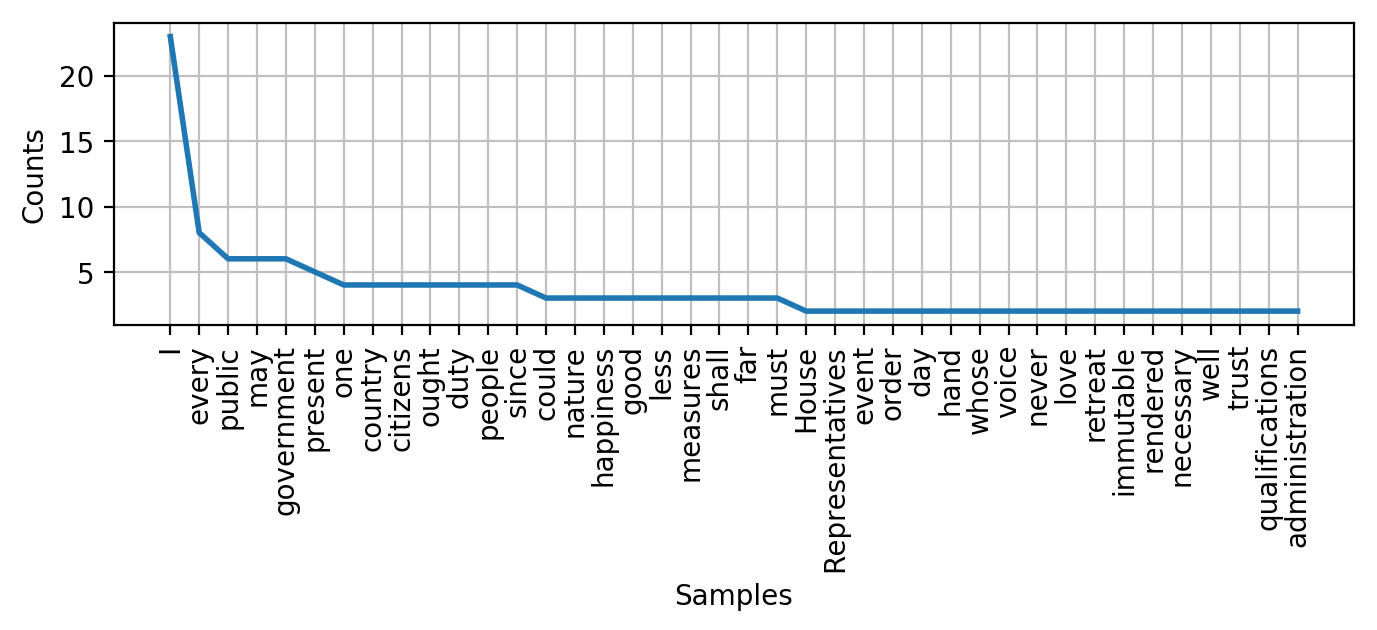

In [50]:
w_processed = remove_stopwords(washington_raw)
w_dist = FreqDist(word_tokenize(w_processed))

print(w_dist.most_common(10))
plt.figure(figsize=(8,2), dpi=200)
w_dist.plot(40,cumulative=False)
plt.show()

Another form of noise in data

In [38]:
print(w_dist['On'])
print(w_dist['All'])


2
1


[('I', 23), ('every', 8), ('public', 6), ('may', 6), ('government', 6), ('present', 5), ('one', 4), ('country', 4), ('citizens', 4), ('ought', 4)]


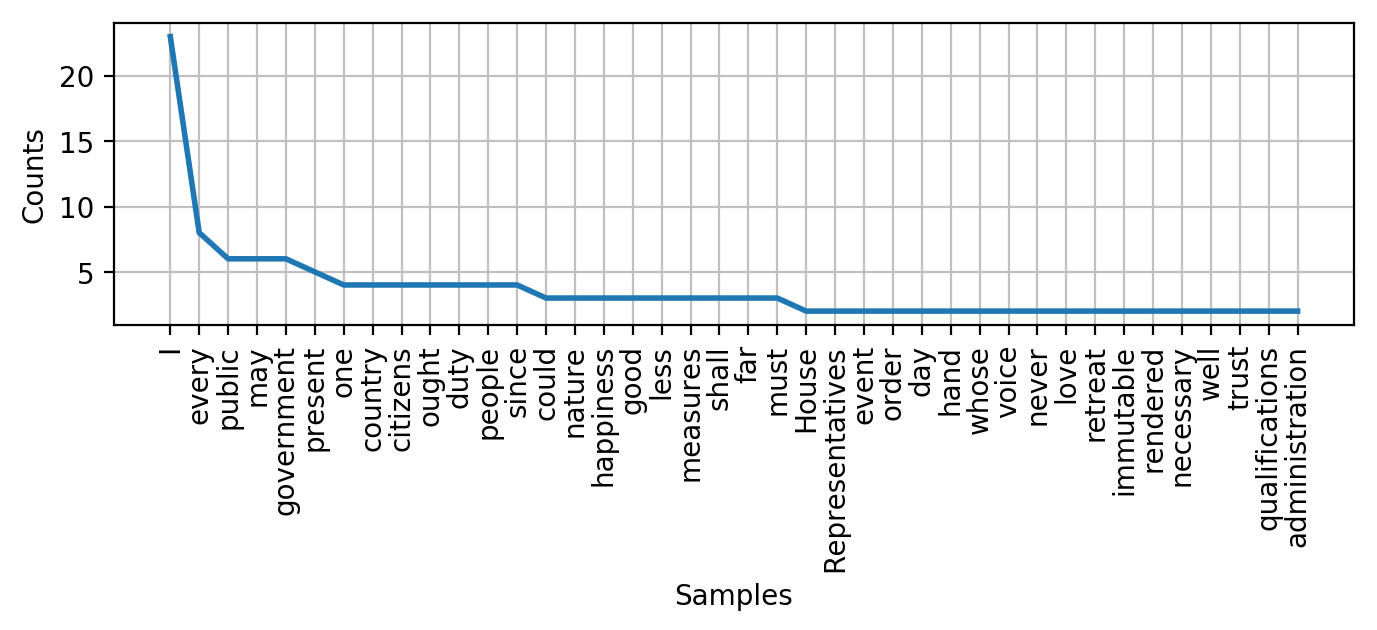

In [39]:
for _t in [',','.',';','-','_','?','On','In','All']:
    stop_words.append(_t)

w_processed = remove_stopwords(washington_raw)
w_dist = FreqDist(word_tokenize(w_processed))

print(w_dist.most_common(10))
plt.figure(figsize=(8,2), dpi=200)
w_dist.plot(40,cumulative=False)
plt.show()

**Normalization**<br> 
Normalization considers another type of noise in the text. For example, connection, connected, connecting word reduce to a common word "connect". It reduces derivationally related forms of a word to a common root word. <br>
>**Lemmatization**
Lemmatization reduces words to their base word, which is linguistically correct lemmas. It transforms root word with the use of vocabulary and morphological analysis. <br>
**Stemming**
Stemming is a process of linguistic normalization, which reduces words to their root and removes the derivational affixes. For example, connection, connected, connecting word reduce to a common word "connect".

In [41]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()
word ="different"
word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


**POS Tagging** <br>
The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a _NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc._ based on the context. POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.

In [42]:
nltk.pos_tag(word_tokenize(w_processed))

[('Fellow-Citizens', 'JJ'),
 ('Senate', 'NNP'),
 ('House', 'NNP'),
 ('Representatives', 'VBZ'),
 (':', ':'),
 ('Among', 'IN'),
 ('vicissitudes', 'NNS'),
 ('incident', 'JJ'),
 ('life', 'NN'),
 ('event', 'NN'),
 ('could', 'MD'),
 ('filled', 'VB'),
 ('greater', 'JJR'),
 ('anxieties', 'NNS'),
 ('notification', 'NN'),
 ('transmitted', 'VBD'),
 ('order', 'NN'),
 ('received', 'VBD'),
 ('14th', 'CD'),
 ('day', 'NN'),
 ('present', 'JJ'),
 ('month', 'NN'),
 ('one', 'CD'),
 ('hand', 'NN'),
 ('I', 'PRP'),
 ('summoned', 'VBD'),
 ('Country', 'NNP'),
 ('whose', 'WP$'),
 ('voice', 'NN'),
 ('I', 'PRP'),
 ('never', 'RB'),
 ('hear', 'VBP'),
 ('veneration', 'NN'),
 ('love', 'IN'),
 ('retreat', 'NN'),
 ('I', 'PRP'),
 ('chosen', 'VBP'),
 ('fondest', 'JJS'),
 ('predilection', 'NN'),
 ('flattering', 'VBG'),
 ('hopes', 'NNS'),
 ('immutable', 'JJ'),
 ('decision', 'NN'),
 ('asylum', 'IN'),
 ('declining', 'VBG'),
 ('years', 'NNS'),
 ('--', ':'),
 ('retreat', 'NN'),
 ('rendered', 'JJ'),
 ('every', 'DT'),
 ('day', 

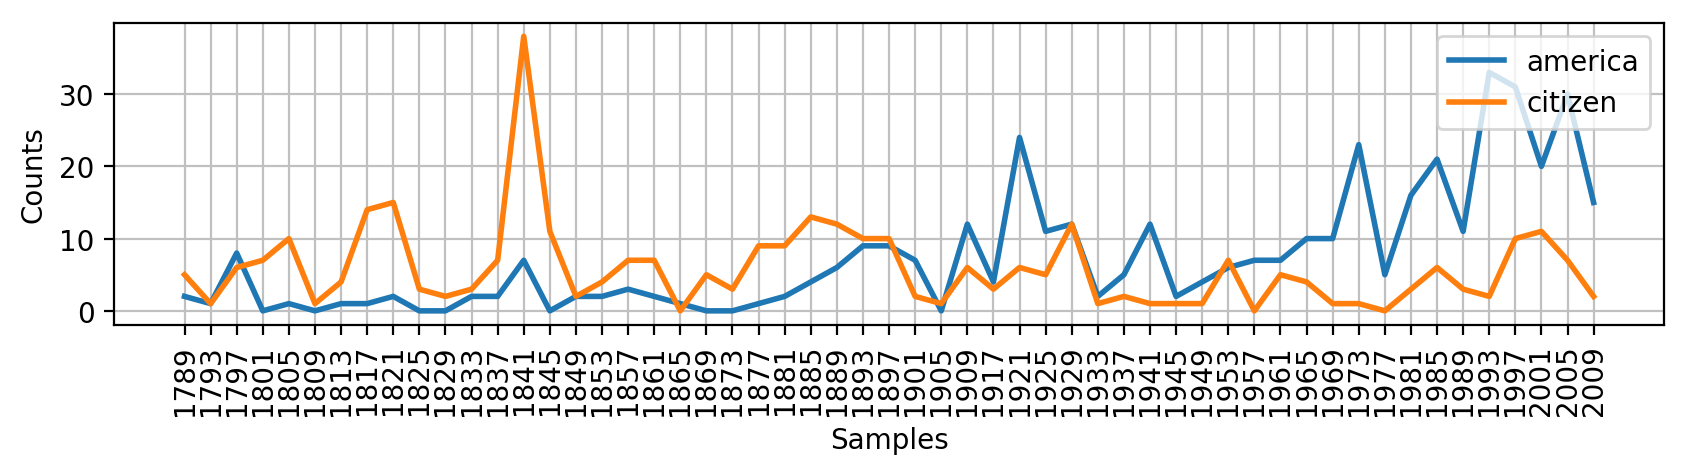

In [43]:
plt.figure(figsize=(10,2), dpi=200)
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))
cfd.plot()

## Part 2 - Spelling Recommender

For this part we will create a spelling recommender, that takes a list of misspelled words and recommends a correctly spelled word for every word in the list.

For every misspelled word, the recommender finds the word in `correct_spellings` that has the shortest distance*, and starts with the same letter as the misspelled word, and return that word as a recommendation.
**[Jaccard distance](https://en.wikipedia.org/wiki/Jaccard_index) on the trigrams of the two words.**


In [47]:
from nltk.corpus import words
from nltk.util import ngrams
from nltk import jaccard_distance

correct_spellings = words.words()
entries=['sppeed', 'deceiv', 'hearn', 'candl', 'brittl', 'servitute']

similar=[]
for entry in entries:
    distance=[]
    for i,word in enumerate(correct_spellings):
        distance.append((i,jaccard_distance(set(ngrams(entry,n=3)),set(ngrams(word,n=3)))))
    distance= sorted(distance, key = lambda x: x[1])
    for item in distance:
        w=correct_spellings[item[0]]
        if(w[0]==entry[0]):
            similar.append(w)
            break;

print(similar)

['speed', 'deceive', 'hear', 'candle', 'brittle', 'servitude']
